# Problem Statement
The data files Bollywood.csv and Bollywood - 2 .csv contains the box office collection and social media promotion information about the movies released in 2013 – 2015 period. 
Following is the information about the columns (names can vary):
        
        Serial Id of movie
        Release date of movie
        Release time of movie like Long Weekend (3), Festive Season (1), Holiday Season (2), and Normal (4)
        Genre of movie like Romance, Thriller, Action, comedy etc.
        Budget of movie in crores
        Box office collection of movie in crore
        YouTube views of movies trailers
        YouTube likes for the movie trailers
        YouTube dislikes for the movie trailers

Q1. Identify and rectify the eight prominent data quality issues present in the given datasets.


Q2. How many records are present in the dataset? Print the metadata information of dataset.

Q3. How many movies in each genre got released in different release times? 

Q4. Which month of the year, maximum movie releases are seen? 

Q5. Which month of the year typically sees most releases of high budgeted movies, that is, movies with budget of 25 crore or more? 

Q6. Which are the top 10 movies with maximum return of investment (ROI)? Calculate ROI as (Box office collection – Budget) / Budget. 

In [564]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Q1. Identify and rectify the eight prominent data quality issues present in the given datasets.

#### Data Integration

In [565]:
# Define a column column names for datasets
column_names = ["Movie_ID","Release_Date","Movie_Name","Release_Time","Genre","Budget(Cr)","Box_Office_Collection","Youtube_Views","Youtube_Likes","Youtube_Dislikes","Youtube_Like_Dislikes"]
# Load Datasets 
df1 = pd.read_csv('bollywood.csv',skiprows=1,names=column_names)
df2 = pd.read_csv('bollywood - 2.csv',skiprows=1,names=column_names)
# The above command will automatically creates the missing column in dataset2 and populate all values as null.

In [566]:
# Head of the dataset1
df1.head()

Movie_ID Release_Date          Movie_Name  Release_Time         Genre  \
0         1  Apr-18-2014            2 States             3  RomanceGenre   
1         2   Jan-4-2013        Table No. 21             4     Thriller    
2         3  Jul-18-2014  Amit Sahni Ki List             4   ComedyGenre   
3         4   Jan-4-2013    Rajdhani Express             4    DramaGenre   
4         5   Jul-4-2014        Bobby Jasoos            44   ComedyGenre   

  Budget(Cr) Box_Office_Collection  Youtube_Views  Youtube_Likes  \
0       36Cr                   104        8576361        26622.0   
1       Cr10                    12        1087320         1129.0   
2       10Cr                     4         572336          586.0   
3        7Cr                   383          42626           86.0   
4       18Cr                  10.8        3113427         4512.0   

   Youtube_Dislikes  Youtube_Like_Dislikes  
0            2527.0                  29149  
1             137.0                   1266  
2              54.0                    640  
3              19.0                    105  
4            1224.0                   5736

In [567]:
# Check in case of null values in any records
df1.isnull().any()
df1.isnull().sum()

Movie_ID                 0
Release_Date             0
Movie_Name               0
Release_Time             0
Genre                    0
Budget(Cr)               0
Box_Office_Collection    0
Youtube_Views            0
Youtube_Likes            1
Youtube_Dislikes         3
Youtube_Like_Dislikes    0
dtype: int64

# Observations on dataset1
#1. Release_time column have a category '44' which is not listed.
#2. Genre column have included the "Genre" additional string included in few records.
#3. Budget(Cr) column few records have included the Cr string appended left or right to the number values.
#4. Youtube_Likes and Youtube_Dislikes to be an integers instaed of float.
#5. Youtube_Likes and Youtube_Dislikes are having null values in the data.

In [568]:
# Head of dataset2
df2.head()

Movie_ID Release_Date             Movie_Name Release_Time     Genre  \
0        51     4-Jul-14  Lekar Hum Deewana Dil            N   Romance   
1        52    22-Mar-13                  Aatma            N  Thriller   
2        53     4-Apr-14         Main Tera Hero           LW    Comedy   
3        54    22-Mar-13               Sona Spa            N  Thriller   
4        55    29-Mar-13             Himmatwala            N    Action   

   Budget(Cr)  Box_Office_Collection  Youtube_Views  Youtube_Likes  \
0          16                   2.50        3998331           2307   
1           8                   8.78         841891            997   
2          40                  55.00        4903941          12657   
3          10                   0.24          79430             61   
4          50                 100.00        2501277              1   

   Youtube_Dislikes  Youtube_Like_Dislikes  
0               497                    NaN  
1               306                    NaN  
2              2139                    NaN  
3               112                    NaN  
4                 1                    NaN

In [569]:
# Any null values in an features in dataframe2
df2.isnull().any()
df2.isnull().sum()

Movie_ID                  0
Release_Date              0
Movie_Name                0
Release_Time              0
Genre                     0
Budget(Cr)                0
Box_Office_Collection     0
Youtube_Views             0
Youtube_Likes             0
Youtube_Dislikes          0
Youtube_Like_Dislikes    99
dtype: int64

# Observations on dataframe2
#1. Release_Date column date format is different in 2 dataframes.
#2. Release_time column is having a different categories compared to dataframe1.
#3. Youtube_Like_Dislikes column is not available in dataframe2
#4. Youtube_Like_Dislikes column doen't exist in the dataset2 .so , all values are null.

In [570]:
# Find unique values in any feature/attribute
df1["Box_Office_Collection"].unique()
# There is a Cr string appended to few values

array(['104', '12', '4', '383', '10.8', '35', '24.6', '40', '27',
       'Cr0.01', '6', '10.25', '105.5', '1.8', '163', 'Cr0.09', '162',
       '58.9', '12.6', '3.65', '14.3', '76.7', '69', '21.5', '103', '44',
       '27.16', '10', '1.5', '25', '65', '62.2', '27.25', '16', '129',
       '130', '32', '63.7', '22', '111', '39.4', '377', '5.82', '36',
       '11', '32.7', '2', 'Cr0.5', '2.5'], dtype=object)

###### Replacing Cr with null in the "Budget" and "Box office collection" features because these some mathematical operations to be calculated on the neumeric values.

In [571]:
df1["Budget(Cr)"] = df1["Budget(Cr)"].str.replace("Cr","")
df1["Box_Office_Collection"] = df1["Box_Office_Collection"].str.replace("Cr","")

#### Assuming that it's a typo error because we have only 4 categories of Release_time documented

In [572]:
df1["Release_Time"] = df1["Release_Time"].replace({44: 4})

#### Feature Derivation
Splitting the Release Date into 3 new features for easy transactions/calculations and to make the transformations simple.# Release date format is not mandatory in the current business requirement to perform any operations. 

In [573]:
df1[["Release_Month","Release_Day","Release_Year"]] = df1.Release_Date.str.split("-",expand=True)
df2[["Release_Day","Release_Month","Release_Year"]] = df2.Release_Date.str.split("-",expand=True)

#### Concatenate 2 dataframes

In [574]:
dataset  = pd.concat([df1,df2],ignore_index= True)
dataset

Movie_ID Release_Date                   Movie_Name Release_Time  \
0           1  Apr-18-2014                     2 States            3   
1           2   Jan-4-2013                 Table No. 21            4   
2           3  Jul-18-2014           Amit Sahni Ki List            4   
3           4   Jan-4-2013             Rajdhani Express            4   
4           5   Jul-4-2014                 Bobby Jasoos            4   
..        ...          ...                          ...          ...   
145       145    27-Feb-15           Dum Laga Ke Haisha            N   
146       146    13-Mar-15                         NH10            N   
147       147    20-Mar-15  Dilliwali Zaalim Girlfriend            N   
148       148    20-Mar-15                     Hunterrr            N   
149       149    23-May-14                Kochadaiiyaan           HS   

            Genre Budget(Cr) Box_Office_Collection  Youtube_Views  \
0    RomanceGenre         36                   104        8576361   
1       Thriller          10                    12        1087320   
2     ComedyGenre         10                     4         572336   
3      DramaGenre          7                   383          42626   
4     ComedyGenre         18                  10.8        3113427   
..            ...        ...                   ...            ...   
145        Comedy         15                    30        3250917   
146      Thriller         13                  32.1        5592977   
147        Comedy         32                    12        2316047   
148        Comedy          5                 11.89        4674795   
149        Action        150                   120        4740727   

     Youtube_Likes  Youtube_Dislikes  Youtube_Like_Dislikes Release_Month  \
0          26622.0            2527.0                29149.0           Apr   
1           1129.0             137.0                 1266.0           Jan   
2            586.0              54.0                  640.0           Jul   
3             86.0              19.0                  105.0           Jan   
4           4512.0            1224.0                 5736.0           Jul   
..             ...               ...                    ...           ...   
145         8185.0             615.0                    NaN           Feb   
146        15464.0            1513.0                    NaN           Mar   
147         4289.0             807.0                    NaN           Mar   
148         3706.0             762.0                    NaN           Mar   
149        13466.0            2649.0                    NaN           May   

    Release_Day Release_Year  
0            18         2014  
1             4         2013  
2            18         2014  
3             4         2013  
4             4         2014  
..          ...          ...  
145          27           15  
146          13           15  
147          20           15  
148          20           15  
149          23           14  

[150 rows x 14 columns]

#### Converting the "Budget(Cr)","Box_Office_Collection" feature to float datatype

In [575]:
dataset[["Budget(Cr)","Box_Office_Collection"]] = dataset[["Budget(Cr)","Box_Office_Collection"]].astype(float)

#### Feature Creation:##Adding new feature to calculate Return on Investment(ROI)

In [576]:
dataset["Return_On_Investment"] = (dataset["Box_Office_Collection"] - dataset["Budget(Cr)"] )/ dataset["Budget(Cr)"]

#### Cleanup the movie Release month and year based on the External sources reference as it is a small dataset. This can be handled by any external API to clear data issues.

In [577]:
dataset["Release_Year"] = dataset["Release_Year"].replace({'204': 2014,'13': 2013,'14': 2014,'15': 2015})
dataset["Release_Month"] = dataset["Release_Month"].replace({'Sqp': 'Sep','Jum': 'Jun','juu': 'Jun'})
dataset["Release_Day"] = dataset["Release_Day"].astype(int)

#### Data Cleansing

In [578]:
#Repalces Genre word with null
dataset["Genre"] = dataset["Genre"].str.replace("Genre", "")
#Removed spaces from left and right do the string
dataset["Genre"] = dataset["Genre"].str.strip()
# Changed the Genre column to categorical
dataset["Genre"] = pd.Categorical(dataset["Genre"])
dataset["Genre"].dtype

CategoricalDtype(categories=['Action', 'Comedy', 'Drama', 'Romance', 'Thriller'], ordered=False)

In [579]:
# Repalced the Release_Time values with intergers to maintain uniformity across the column
dataset["Release_Time"] = dataset['Release_Time'].replace({'FS': 1,'HS': 2,'LW': 3, 'N': 4})
# Assuming it's a typo error. So cleared it.
dataset["Release_Time"] = dataset['Release_Time'].replace(44, 4)
# Changed the Genre column to categorical
dataset["Release_Time"] = pd.Categorical(dataset["Release_Time"])
dataset["Release_Time"].dtype

CategoricalDtype(categories=[1, 2, 3, 4], ordered=False)

#### Missing Values or Null Imputation
#These columns can be dropped from the dataset because these are not useful for the problem statement.

#Youtube_Like_Dislikes column is a sum of Youtube_Likes and Youtube_Dislikes. The null values will be imputed with difference

In [580]:
# Replaced null values with 0 because there is a possibility of Likes and dislikes for a movie can be zero. 
# This problem statement is not using these features for any dependent variables.
dataset["Youtube_Likes"] = dataset["Youtube_Likes"].fillna(dataset["Youtube_Like_Dislikes"] - dataset["Youtube_Dislikes"])
dataset["Youtube_Dislikes"] = dataset["Youtube_Dislikes"].fillna(dataset["Youtube_Like_Dislikes"] - dataset["Youtube_Dislikes"])
dataset[["Youtube_Dislikes","Youtube_Likes"]] = dataset[["Youtube_Dislikes","Youtube_Likes"]].round(0).astype(int)
dataset[["Youtube_Dislikes","Youtube_Likes"]].dtypes

ValueError: Cannot convert non-finite values (NA or inf) to integer

In [581]:
# Youtube_Like_Dislikes column is a sum of Youtube_Likes and Youtube_Dislikes.So filled with a sum value. 
dataset["Youtube_Like_Dislikes"] = dataset["Youtube_Like_Dislikes"].fillna(dataset["Youtube_Dislikes"] + dataset["Youtube_Likes"])
dataset["Youtube_Like_Dislikes"] = dataset["Youtube_Like_Dislikes"].round(0).astype(int)
dataset["Youtube_Like_Dislikes"].dtypes

dtype('int32')

In [582]:
dataset.info()
dataset.isnull().any()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Movie_ID               150 non-null    int64   
 1   Release_Date           150 non-null    object  
 2   Movie_Name             150 non-null    object  
 3   Release_Time           150 non-null    category
 4   Genre                  150 non-null    category
 5   Budget(Cr)             150 non-null    float64 
 6   Box_Office_Collection  150 non-null    float64 
 7   Youtube_Views          150 non-null    int64   
 8   Youtube_Likes          150 non-null    float64 
 9   Youtube_Dislikes       147 non-null    float64 
 10  Youtube_Like_Dislikes  150 non-null    int32   
 11  Release_Month          150 non-null    object  
 12  Release_Day            150 non-null    int32   
 13  Release_Year           150 non-null    int64   
 14  Return_On_Investment   150 non-null    flo

Movie_ID                 False
Release_Date             False
Movie_Name               False
Release_Time             False
Genre                    False
Budget(Cr)               False
Box_Office_Collection    False
Youtube_Views            False
Youtube_Likes            False
Youtube_Dislikes          True
Youtube_Like_Dislikes    False
Release_Month            False
Release_Day              False
Release_Year             False
Return_On_Investment     False
dtype: bool

#### Drop Duplicate values

In [583]:
#df = df.reset_index().drop_duplicates(subset=['Movie_Name'],keep='first').set_index('index')
dataset = dataset.reset_index().drop_duplicates().set_index('index')

#### Finding Outliers

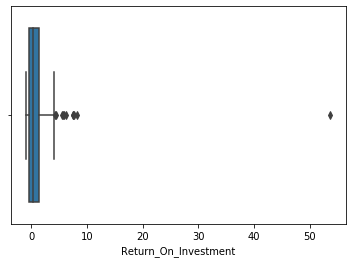

In [584]:
sns.boxplot(dataset['Return_On_Investment'])

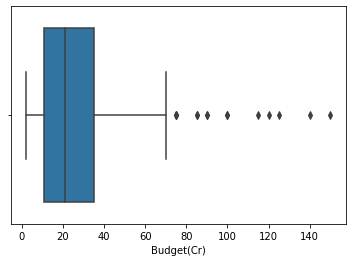

In [585]:
sns.boxplot(dataset['Budget(Cr)'])

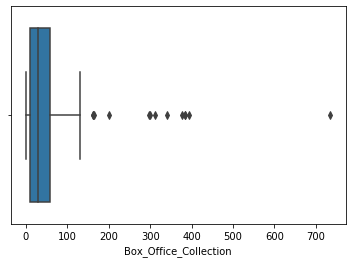

In [586]:
sns.boxplot(dataset['Box_Office_Collection'])

#### Observed multiple outliers in Budget and box office collection which leads to ROI outliers. Considering a small dataset, these will values may appear as outliers but these could be in a different group of movies. So not dropping any outliers based on the domain consideration. 

## Data Quality:
1. Data integration from multiple datasets
2. Missing values/Null values Imputation
3. Feature Extraction/Derivation
4. feature creation
5. Data Correction/Cleaning
6. Outliers
7. Data type changes
8. Feature Deletion
    

#### Question 2: How many records are present in the dataset? Print the metadata information of dataset.

In [587]:

dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 0 to 149
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Movie_ID               150 non-null    int64   
 1   Release_Date           150 non-null    object  
 2   Movie_Name             150 non-null    object  
 3   Release_Time           150 non-null    category
 4   Genre                  150 non-null    category
 5   Budget(Cr)             150 non-null    float64 
 6   Box_Office_Collection  150 non-null    float64 
 7   Youtube_Views          150 non-null    int64   
 8   Youtube_Likes          150 non-null    float64 
 9   Youtube_Dislikes       147 non-null    float64 
 10  Youtube_Like_Dislikes  150 non-null    int32   
 11  Release_Month          150 non-null    object  
 12  Release_Day            150 non-null    int32   
 13  Release_Year           150 non-null    int64   
 14  Return_On_Investment   150 non-null    flo

#### Drop Features

In [588]:
# Few columns can be dropped from dataframe as those are not required for current problem statement.
#dataset.drop(['Movie_ID','Youtube_Like_Dislikes','Release_Date','Youtube_Views','Youtube_Likes','Youtube_Dislikes','Release_Day'], axis = 1, inplace = True)

#### Select Required Features to a dataframe

In [589]:
df = dataset[['Movie_Name','Release_Time','Genre','Budget(Cr)','Box_Office_Collection','Release_Month','Release_Year','Return_On_Investment']]
df

Movie_Name Release_Time     Genre  Budget(Cr)  \
index                                                                   
0                         2 States            3   Romance        36.0   
1                     Table No. 21            4  Thriller        10.0   
2               Amit Sahni Ki List            4    Comedy        10.0   
3                 Rajdhani Express            4     Drama         7.0   
4                     Bobby Jasoos            4    Comedy        18.0   
...                            ...          ...       ...         ...   
145             Dum Laga Ke Haisha            4    Comedy        15.0   
146                           NH10            4  Thriller        13.0   
147    Dilliwali Zaalim Girlfriend            4    Comedy        32.0   
148                       Hunterrr            4    Comedy         5.0   
149                  Kochadaiiyaan            2    Action       150.0   

       Box_Office_Collection Release_Month  Release_Year  Return_On_Investment  
index                                                                           
0                     104.00           Apr          2014              1.888889  
1                      12.00           Jan          2013              0.200000  
2                       4.00           Jul          2014             -0.600000  
3                     383.00           Jan          2013             53.714286  
4                      10.80           Jul          2014             -0.400000  
...                      ...           ...           ...                   ...  
145                    30.00           Feb          2015              1.000000  
146                    32.10           Mar          2015              1.469231  
147                    12.00           Mar          2015             -0.625000  
148                    11.89           Mar          2015              1.378000  
149                   120.00           May          2014             -0.200000  

[150 rows x 8 columns]

#### Question 2: How many records are present in the dataset? Print the metadata information of dataset.

In [590]:
# Describe the data with all datatypes
df.describe(include="all")

Movie_Name  Release_Time   Genre  Budget(Cr)  \
count                     150         150.0     150  150.000000   
unique                    149           4.0       5         NaN   
top     Lekar Hum Deewana Dil           4.0  Comedy         NaN   
freq                        2         100.0      36         NaN   
mean                      NaN           NaN     NaN   29.353333   
std                       NaN           NaN     NaN   28.164459   
min                       NaN           NaN     NaN    2.000000   
25%                       NaN           NaN     NaN   11.000000   
50%                       NaN           NaN     NaN   21.000000   
75%                       NaN           NaN     NaN   35.000000   
max                       NaN           NaN     NaN  150.000000   

        Box_Office_Collection Release_Month  Release_Year  \
count              150.000000           150    150.000000   
unique                    NaN            12           NaN   
top                       NaN           Jan           NaN   
freq                      NaN            20           NaN   
mean                57.863800           NaN   2013.633333   
std                 97.887547           NaN      0.628375   
min                  0.010000           NaN   2013.000000   
25%                  9.085000           NaN   2013.000000   
50%                 28.100000           NaN   2014.000000   
75%                 57.862500           NaN   2014.000000   
max                735.000000           NaN   2015.000000   

        Return_On_Investment  
count             150.000000  
unique                   NaN  
top                      NaN  
freq                     NaN  
mean                1.118094  
std                 4.695888  
min                -0.995000  
25%                -0.468849  
50%                 0.205000  
75%                 1.387500  
max                53.714286

In [591]:
#reset the index
df.reset_index(drop=True, inplace=True)

In [592]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Movie_Name             150 non-null    object  
 1   Release_Time           150 non-null    category
 2   Genre                  150 non-null    category
 3   Budget(Cr)             150 non-null    float64 
 4   Box_Office_Collection  150 non-null    float64 
 5   Release_Month          150 non-null    object  
 6   Release_Year           150 non-null    int64   
 7   Return_On_Investment   150 non-null    float64 
dtypes: category(2), float64(3), int64(1), object(2)
memory usage: 7.8+ KB


#### Question 3:How many movies in each genre got released in different release times? 

In [593]:
genre_RT_df = df[["Movie_Name","Genre","Release_Time"]]
genre_RT_df = genre_RT_df.groupby(["Genre","Release_Time"]).size()
print(genre_RT_df)

Genre     Release_Time
Action    1                3
          2                3
          3                3
          4               15
Comedy    1                3
          2                5
          3                5
          4               23
Drama     1                4
          2                6
          3                1
          4               24
Romance   1                3
          2                3
          3                4
          4               16
Thriller  1                4
          2                1
          3                2
          4               22
dtype: int64


In [594]:
print('No.of Movies Released:' , df.groupby(["Genre","Release_Time"]).size())

No.of Movies Released: Genre     Release_Time
Action    1                3
          2                3
          3                3
          4               15
Comedy    1                3
          2                5
          3                5
          4               23
Drama     1                4
          2                6
          3                1
          4               24
Romance   1                3
          2                3
          3                4
          4               16
Thriller  1                4
          2                1
          3                2
          4               22
dtype: int64


#### Question 4:Which month of the year, maximum movie releases are seen?

In [595]:
# Considering only Release Month
df["Release_Month"].mode()

0    Jan
dtype: object

#### Maximum movies released in the month of Jan

In [596]:
# If we consider both Release month and year
max_movies = df.groupby(["Release_Month","Release_Year"],as_index=False).size().sort_values(ascending=False)
max_movies.head(1)

Release_Month  Release_Year
May            2014            12
dtype: int64

#### Maximum movies release in the month of May if we condsider Year.

#### Question 5: Which month of the year typically sees most releases of high budgeted movies, that is,  movies with budget of 25 crore or more?

In [597]:
# Considering only Release Month
high_budget = df[df["Budget(Cr)"] >=25]
high_budget = high_budget[["Release_Month","Budget(Cr)"]]
high_budget = high_budget.groupby(["Release_Month","Budget(Cr)"],as_index=False).size().sort_values(ascending=False)
high_budget.head(1)

Release_Month  Budget(Cr)
Jul            30.0          3
dtype: int64

In [598]:
# If we consider both Release month and year
high_budget = df[df["Budget(Cr)"] >=25]
high_budget = high_budget[["Release_Month","Release_Year","Budget(Cr)"]]
high_budget = high_budget.groupby(["Release_Month","Release_Year","Budget(Cr)"],as_index=False).size().sort_values(ascending=False)
high_budget.head(1)

Release_Month  Release_Year  Budget(Cr)
Jul            2013          30.0          3
dtype: int64

#### High budget movies release in the month of Jul in 2013 whether we consider ear or not.

#### Question 6:Which are the top 10 movies with maximum return of investment (ROI)?

In [599]:
ROI = df.sort_values(by = "Return_On_Investment",ascending=False,ignore_index=True)
ROI
ROI[["Movie_Name","Budget(Cr)","Release_Month","Box_Office_Collection","Return_On_Investment"]].head(10)

Movie_Name  Budget(Cr) Release_Month  Box_Office_Collection  \
0           Rajdhani Express         7.0           Jan                  383.0   
1                 Aashiqui 2        12.0           Apr                  110.0   
2                         PK        85.0           Dec                  735.0   
3                Grand Masti        35.0           Sep                  298.0   
4               The Lunchbox        10.0           Sep                   85.0   
5                     Fukrey         5.0           Jun                   36.2   
6                   Mary Kom        15.0           Sep                  104.0   
7                     Shahid         6.0           Oct                   40.0   
8  Humpty Sharma Ki Dulhania        20.0           Jul                  130.0   
9         Bhaag Milkha Bhaag        30.0           Jul                  164.0   

   Return_On_Investment  
0             53.714286  
1              8.166667  
2              7.647059  
3              7.514286  
4              7.500000  
5              6.240000  
6              5.933333  
7              5.666667  
8              5.500000  
9              4.466667

#### This the list of movies with top 10 ROI.
# ROI calculated with (Box office collection – Budget) / Budget